In [1481]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient

#rerun california randomizationsc



In [1662]:
#### #user defined variables
JobIDint = 3106203
Clade = "Butterflies"
extra_naming_info = "ecoregions_GENUS"
ecoregion = True
ecoregion_code = "9"
username = 'mchari'
min_size = 6
max_size = 105
interval = 2



In [1663]:
#Local variables: figure out how to automate the jobIDint feature. 
#need to redefine the local
if(ecoregion):
    save_directory = os.getcwd() + '/'+ Clade + '/' +  'ecoregion_data' + '/' + ecoregion_code + '/'
else:
    save_directory = os.getcwd() + '/'+ Clade + '/'
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;
print(save_directory)

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104]
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/Butterflies/ecoregion_data/9/


In [1664]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    if(ecoregion):
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/ecoregion_data/'+ ecoregion_code +'/' + JOBID + '_output_files'
    else:
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/Butterflies/ecoregion_data/9/3106203_output_files
transfer is done


In [1665]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/" + JOBID +"_output_files/"

In [76]:
#for some reason, only went until 430 

In [1666]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/3106203_output_files/


In [1307]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [1232]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [1556]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [1557]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [1667]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [1668]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)

 

KeyError: 'pd85'

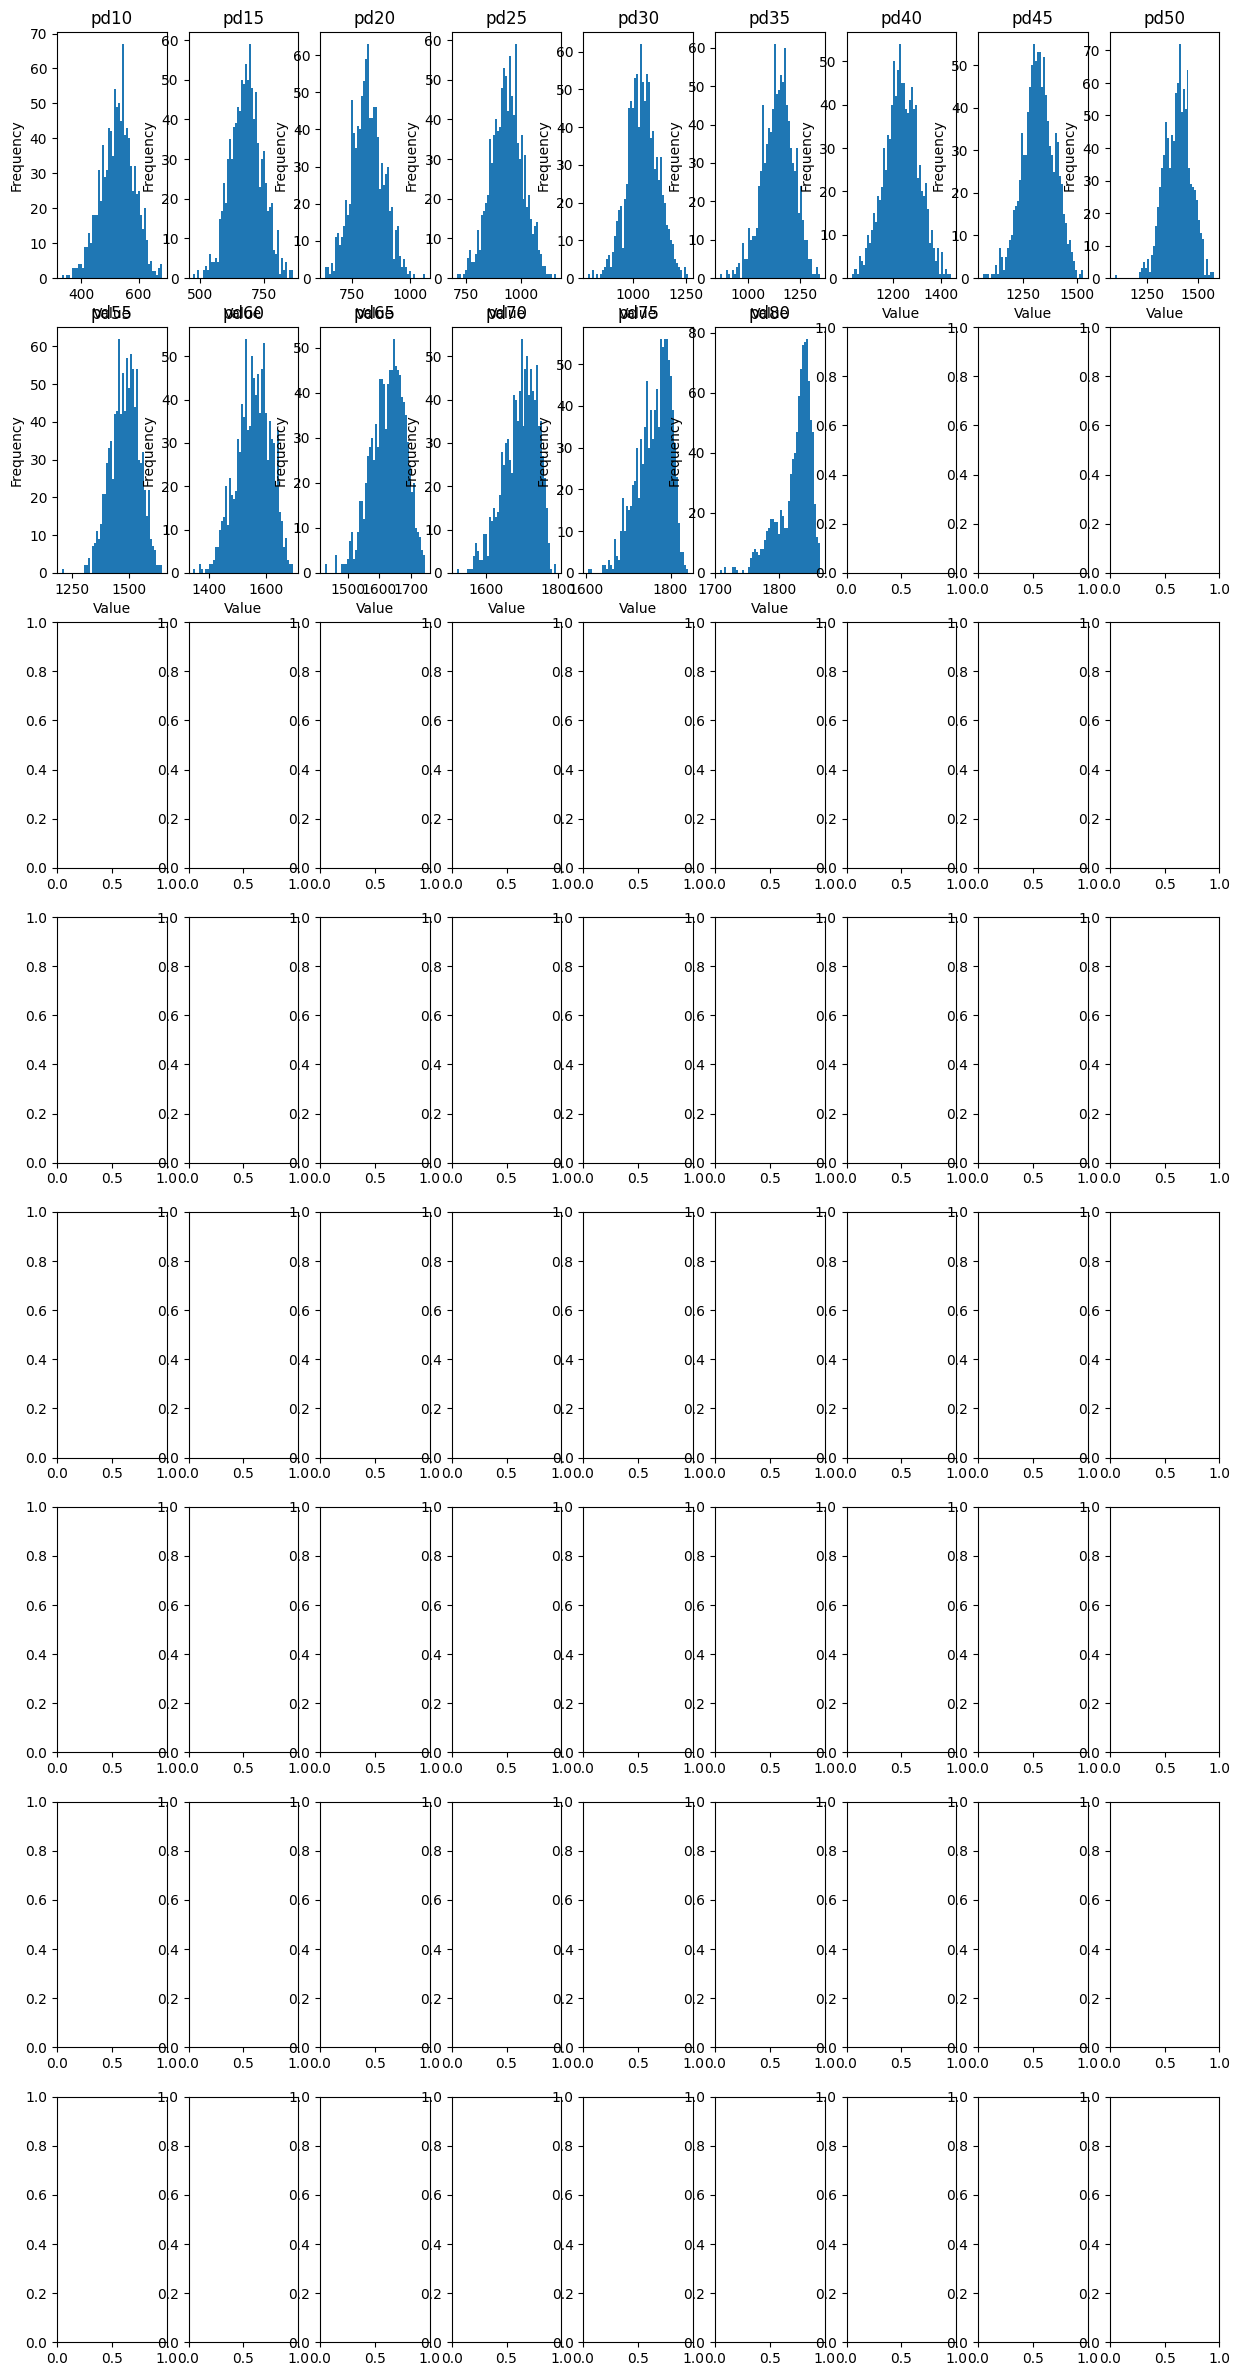

In [98]:
# Define the number of rows and columns for the grid
num_rows = 8  # Number of rows (for each pd)
num_cols = 9   # Number of columns (for each pd)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each pd and create a histogram in the corresponding subplot
for i, pd_value in enumerate(range(10, 700, 5)):
    axs[i].hist(new_pd[f'pd{pd_value}'], bins=50)
    axs[i].set_title(f'pd{pd_value}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

plt.draw()
# Save the plot as an image file
save_directory = 'birds/histograms_grid_ecoregion_pd'+ ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()


#this is for all of california. 

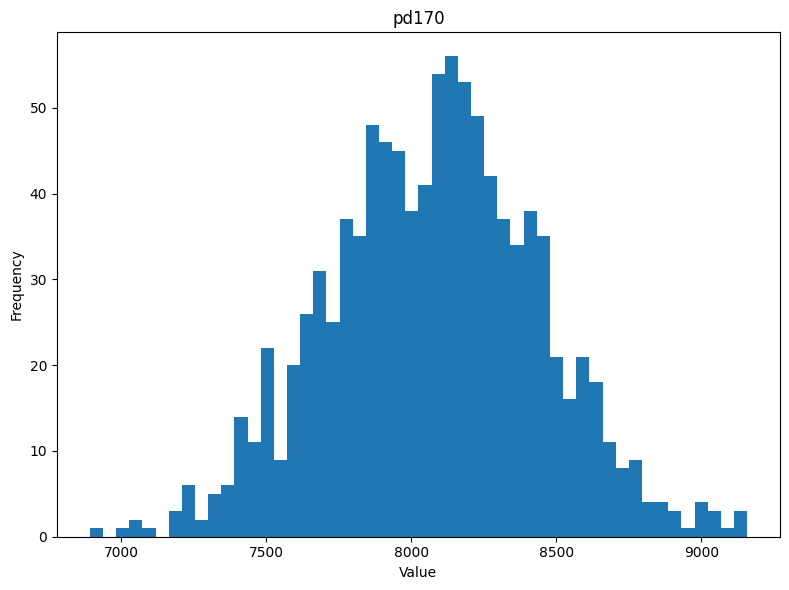

In [427]:
import matplotlib.pyplot as plt

# Filter the data to include only pd170
pd170_data = new_pd['pd170']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram for pd170
ax.hist(pd170_data, bins=50)

# Set plot title and labels
ax.set_title('pd170')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
save_directory = 'birds/histogram_pd170_ecoregion_pd_species_leve' + ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()

In [17]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [361]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [17]:
#could definitely do this in a much much much much much cleaner and better way. 
def quantile_bootstrap(dictionary): #assuming normal distribution
    low_25_array =[]
    low_10_array =[]
    low_5_array = []
    low_2point5_array = []
    low_2_array = []
    low_1point5_array = []
    low_1_array = []
    low_point5_array = []
    high_25_array =[]
    high_10_array =[]
    high_5_array = []
    high_2point5_array = []
    high_2_array = []
    high_1_array = []
    high_1point5_array = []
    high_point5_array = []
    med_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        low_25 = np.percentile(data_temp, 25.0)
        low_10 = np.percentile(data_temp, 10.0)
        low_5 = np.percentile(data_temp, 5.0)
        low_2point5 = np.percentile(data_temp, 2.5)
        low_2 = np.percentile(data_temp, 2)
        low_1point5 = np.percentile(data_temp, 1.5)
        low_1 = np.percentile(data_temp, 1)
        low_point5 = np.percentile(data_temp,0.5)
        high_25 = np.percentile(data_temp, 75.0)
        high_10 = np.percentile(data_temp, 90.0)
        high_5 = np.percentile(data_temp, 95.0)
        high_2point5 = np.percentile(data_temp, 97.5)
        high_2 = np.percentile(data_temp, 98)
        high_1point5 = np.percentile(data_temp,98.5)
        high_1 = np.percentile(data_temp, 99)
        high_point5 = np.percentile(data_temp, 99.5)
        low_25_array.append(low_25)
        low_10_array.append(low_10)
        low_5_array.append(low_5)
        low_2point5_array.append(low_2point5)
        low_2_array.append(low_2)
        low_1point5_array.append(low_1point5)
        low_1_array.append(low_1)
        low_point5_array.append(low_point5)
        high_25_array.append(high_25)
        high_10_array.append(high_10)
        high_5_array.append(high_5)
        high_2point5_array.append(high_2point5)
        high_2_array.append(high_2)
        high_1point5_array.append(high_1point5)
        high_1_array.append(high_1)
        high_point5_array.append(low_point5)

        med_array.append(np.percentile(data_temp, 50)) #median value.
        mean_array.append(np.mean(data_temp))
    
    return(low_point5_array, low_1_array, low_1point5_array, low_2_array, low_2point5_array, low_5_array,low_10_array,low_25_array, high_25_array, high_10_array, high_2point5_array, high_2_array, high_1point5_array, high_1_array, high_point5_array, med_array, mean_array)



In [18]:
#cleaner version of quantiles function 
def quantile_bootstrap_clean(dictionary): 
    data = {}
    for key in dictionary.keys():
        data_temp = dictionary[key]
        quantiles = [0.5, 1, 1.5, 2, 2.5, 5, 10, 25, 75, 90, 97.5, 98, 98.5, 99, 99.5]
        percentiles = {q: np.percentile(data_temp, q) for q in quantiles}
        percentiles['Median'] = np.percentile(data_temp, 50)
        percentiles['Mean'] = np.mean(data_temp)
        data[key] = percentiles

    return pd.DataFrame(data)

In [1669]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

print(CI_mntd_bootstrap)
#seems like size of 55 throws an error. 

([72.23963919166667, 67.36559179375, 65.220593285, 63.793089220833366, 61.66491649285714, 60.066767371875, 60.28808671666667, 57.4970122775, 57.03652254772728, 55.51383872500001, 56.681494871153845, 54.893949644642845, 54.50037373333333, 53.49483567812501, 53.14422532647059, 52.35320899861111, 52.824483153947384, 51.82571625125, 52.26057023809523, 52.4633698602273, 52.42541087608692, 52.86613188229163, 55.32500328], [165.954597666667, 148.42601565625, 130.285925035, 116.65430029583364, 109.57138309285715, 103.466888740625, 98.16028766944444, 93.7759660375, 88.94641105454548, 85.45750013749998, 82.18985354038466, 78.9093097017857, 77.39034131166663, 73.65558639687501, 72.10869493382357, 69.87018569999996, 67.49153947368416, 65.71112887875, 64.25101187976188, 62.8570684693182, 60.88339864456523, 58.9285624583333, 55.32500328], [121.93032655166665, 108.59977522725, 99.6359150822, 92.19154267083333, 86.83733533085714, 82.61588065962499, 79.87719708422222, 76.2682614689, 73.29815238727272, 

In [1670]:
quantile_mpd_bootstrap = quantile_bootstrap(new_mpd) #CI for mpd

quantile_mntd_bootstrap = quantile_bootstrap(new_mntd) #CI for mpd

quantile_pd_bootstrap = quantile_bootstrap(new_pd) #CI for mpd


#need to expor these quantile data as csvs 

In [1671]:
quantile_mpd_bootstrap_clean = quantile_bootstrap_clean(new_mpd)

quantile_mntd_bootstrap_clean = quantile_bootstrap_clean(new_mntd)

quantile_pd_bootstrap_clean = quantile_bootstrap_clean(new_pd)

               pd6         pd8        pd10        pd12         pd14  \
0.5     296.059433  415.822038  508.503130  571.162003   665.343065   
1       326.300515  427.689841  516.393448  592.457283   691.647041   
1.5     333.814253  440.301782  532.600800  605.628882   701.758675   
2       340.234588  449.942802  537.803163  616.337403   713.334593   
2.5     343.313045  453.555512  541.104009  624.866490   719.776320   
5       368.190653  469.799703  565.001987  646.669093   746.017628   
10      392.038024  492.382473  584.613739  675.143923   769.554602   
25      427.718651  532.947410  626.087111  720.108896   811.067815   
75      494.796556  614.271791  713.717874  811.402999   902.711567   
90      519.904781  644.536108  747.936013  847.015032   939.049081   
97.5    543.024589  672.956893  787.387016  877.397024   987.258729   
98      544.766360  674.577109  791.521066  882.742568   991.258884   
98.5    549.802353  678.505424  798.781508  887.310627   997.158721   
99    

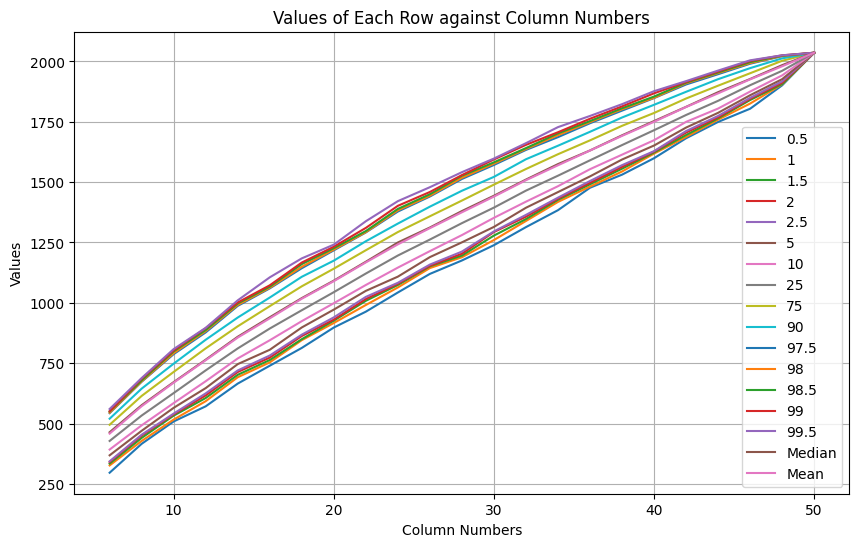

In [1672]:
print(quantile_pd_bootstrap_clean)
plt.figure(figsize=(10, 6))
for index, row in quantile_pd_bootstrap_clean.iterrows():
    plt.plot([int(col[2:]) for col in quantile_pd_bootstrap_clean.columns], row, label=index)

plt.xlabel('Column Numbers')
plt.ylabel('Values')
plt.title('Values of Each Row against Column Numbers')
plt.legend()
plt.grid(True)
plt.show()

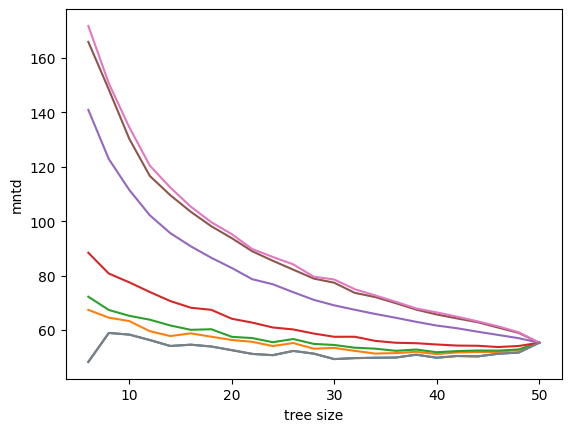

In [1673]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mntd_bootstrap)-1):
    if i % 2 == 0:
        plt.plot(tree_sizes, quantile_mntd_bootstrap[i])

labels2 = ("low", "high", "mean")
plt.ylabel("mntd")
plt.xlabel("sample size")
plt.xlabel('tree size')

plt.savefig(os.path.join(save_directory, 'genus_level_mntd_95CI.jpg'), dpi=1200)
plt.show()

In [109]:
print(os.path.join(save_directory, 'species_mntd_95CI.jpg'))

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/Plants/ecoregion_data/9/species_mntd_95CI.jpg


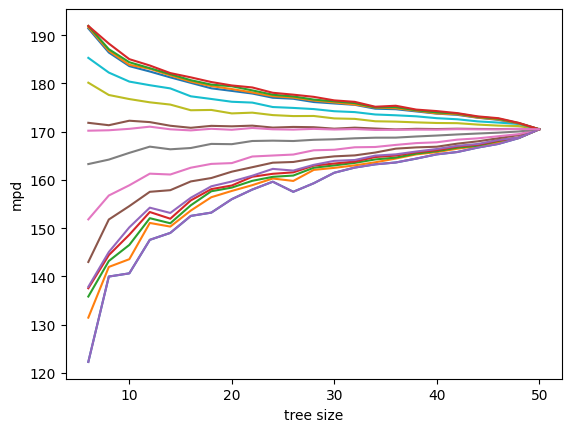

In [1674]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mpd_bootstrap)):
    plt.plot(tree_sizes, quantile_mpd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'genus_mpd_95CI.jpg'), dpi=1200)
plt.show()

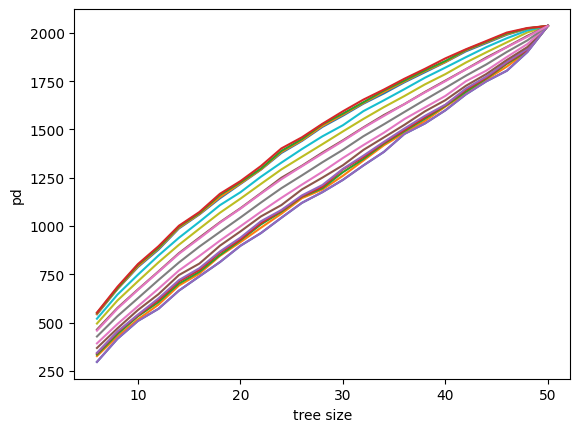

In [1675]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_pd_bootstrap)):
    plt.plot(tree_sizes, quantile_pd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'genus_pd_95CI.jpg'), dpi=1200)
plt.show()

In [ ]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

#os.listdir(target_directory)

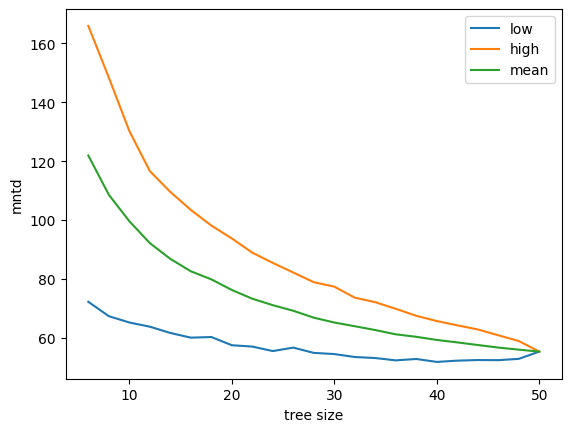

In [1676]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'genus_mntd_95CI.jpg'), dpi=1200)


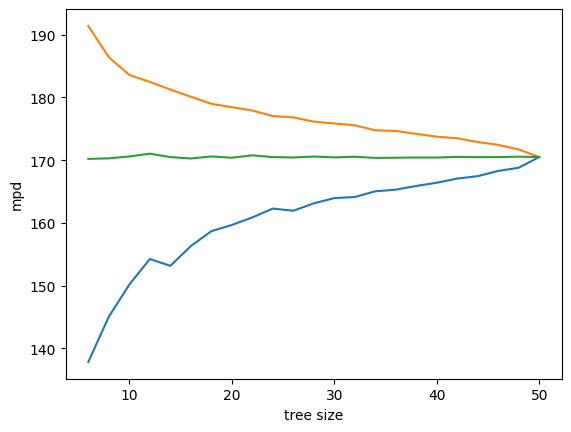

In [1677]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'genus_mpd_95CI.jpg'), dpi=1200)


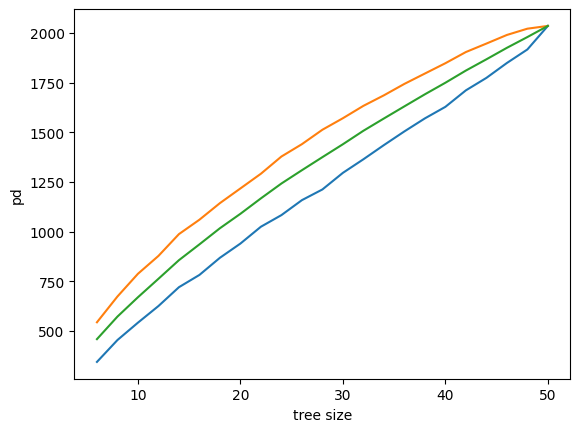

In [1678]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'genus_pd_95CI.jpg'), dpi=1200)



In [1679]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_mpd_output_bootstrap.csv"))


In [1680]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "CI_mntd_output_bootstrap.csv"))

In [1681]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_pd_output_bootstrap_bird.csv"))

In [1682]:

quantile_export_mpd = pd.DataFrame(quantile_mpd_bootstrap_clean)
quantile_export_mpd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mpd_output_bootstrap.csv"))

quantile_export_mntd = pd.DataFrame(quantile_mntd_bootstrap_clean)
quantile_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mntd_output_bootstrap.csv"))

quantile_export_pd = pd.DataFrame(quantile_pd_bootstrap_clean)
quantile_export_pd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_pd_output_bootstrap.csv"))

